# Student Performance Factors

#### O quanto fatores externos e internos impactam o desempenho de alunos em exames? 

#### Informa√ß√µes sobre o Dataset

| **Atributo**                  | **Descri√ß√£o**                                                                 |
|------------------------------|-------------------------------------------------------------------------------|
| `Hours_Studied`              | N√∫mero de horas de estudo por semana.                                        |
| `Attendance`                 | Porcentagem de presen√ßa nas aulas.                                          |
| `Parental_Involvement`      | N√≠vel de envolvimento dos pais na educa√ß√£o do aluno (Low, Medium, High).     |
| `Access_to_Resources`       | Disponibilidade de recursos educacionais (Low, Medium, High).                |
| `Extracurricular_Activities`| Participa√ß√£o em atividades extracurriculares (Yes, No).                      |
| `Sleep_Hours`               | M√©dia de horas de sono por noite.                                            |
| `Previous_Scores`           | Notas obtidas em provas anteriores.                                          |
| `Motivation_Level`          | N√≠vel de motiva√ß√£o do aluno (Low, Medium, High).                             |
| `Internet_Access`           | Acesso √† internet (Yes, No).                                                 |
| `Tutoring_Sessions`         | N√∫mero de sess√µes de refor√ßo escolar por m√™s.                                |
| `Family_Income`             | N√≠vel de renda familiar (Low, Medium, High).                                 |
| `Teacher_Quality`           | Qualidade dos professores (Low, Medium, High).                               |
| `School_Type`               | Tipo de escola frequentada (Public, Private).                                |
| `Peer_Influence`            | Influ√™ncia dos colegas no desempenho acad√™mico (Positive, Neutral, Negative).|
| `Physical_Activity`         | M√©dia de horas de atividade f√≠sica por semana.                               |
| `Learning_Disabilities`     | Presen√ßa de dificuldades de aprendizagem (Yes, No).                          |
| `Parental_Education_Level`  | N√≠vel de escolaridade dos pais (High School, College, Postgraduate).         |
| `Distance_from_Home`        | Dist√¢ncia de casa at√© a escola (Near, Moderate, Far).                        |
| `Gender`                    | G√™nero do aluno (Male, Female).                                              |
| `Exam_Score`                | Nota final na prova.                                                         |

#### O dataset conta com 20 colunas e 6.607 linhas

### Perguntas a serem respondidas:

#### 1. Qual o perfil dos alunos? Qual o maior intervalo de notas no geral? Qual a distribui√ß√£o de horas e frequ√™ncia?
#### 2. Quais os quartis de notas e frequ√™ncia, al√©m do desvio padr√£o?
#### 3. Qual o perfil mais comum de alunos quando olhamos para recursos (educacionais, internet, atividades extras e renda)?
#### 4. Existe correla√ß√£o entre horas estudades e notas dos exames?
#### 5. Existe rela√ß√£o entre renda e forma√ß√£o dos pais com sucesso do aluno?
#### 6. Quais vari√°veis tem maior rela√ß√£o com presen√ßa?
#### 7. Como o envolvimento parental impacta em outras caracter√≠ticas (recursos educacionais, atividades extracurriculares e nivel de motiva√ß√£o)?
#### 8. Qual seria o fator mais importate para uma boa nota: horas de sono, presen√ßa ou horas estudadas?
#### 9. Existe algum grupo mais, ou menos, predisposto a ser negativamente influenciado pelos pares, quando olhas para envolvimento familiar, renda, ou g√™nero?

## Importa√ß√£o de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

## Importa√ß√£o de csv

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")
df = data.copy()

## Pergunta 1

#### 1. Qual o perfil dos alunos? Qual o maior intervalo de notas no geral? Qual a distribui√ß√£o de horas e frequ√™ncia?

##### Fun√ß√£o de estat√≠sticas
###### Uma fun√ß√£o para nos poupar o trabalho de puxar m√©dia, moda, mediana, m√≠nimo e etcs

In [3]:
def est(x):
    print("Estat√≠sticas da Coluna:", x)
    print(" - M√©dia:", df[x].mean())
    print(" - Mediana:", df[x].median())
    print(" - Moda:", df[x].mode().values[0] if not df[x].mode().empty else "N√£o existe moda")
    print(" - M√≠nimo:", df[x].min())
    print(" - M√°ximo:", df[x].max())
    print(" - Desvio padr√£o:", df[x].std())
    print(" - Vari√¢ncia:", df[x].var())
    print(" - 1¬∫ Quartil (Q1):", df[x].quantile(0.25))
    print(" - 3¬∫ Quartil (Q3):", df[x].quantile(0.75))
    print(" - Coeficiente de assimetria (Skewness):", df[x].skew())
    print(" - Curtose (Kurtosis):", df[x].kurtosis())

##### Intervalo de Notas

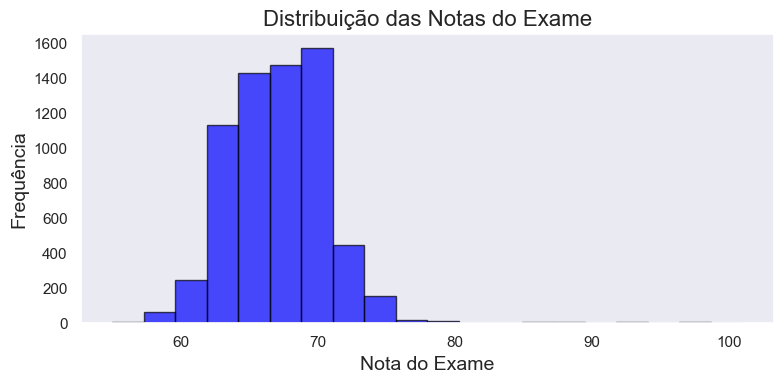

In [4]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Exam_Score'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando t√≠tulo e r√≥tulos aos eixos
plt.title('Distribui√ß√£o das Notas do Exame', fontsize=16)
plt.xlabel('Nota do Exame', fontsize=14)
plt.ylabel('Frequ√™ncia', fontsize=14)

# Melhorando o layout e mostrando o gr√°fico
plt.grid(False)
plt.tight_layout()
plt.show()

In [5]:
est('Exam_Score')

Estat√≠sticas da Coluna: Exam_Score
 - M√©dia: 67.23565914938702
 - Mediana: 67.0
 - Moda: 68
 - M√≠nimo: 55
 - M√°ximo: 101
 - Desvio padr√£o: 3.890455781261732
 - Vari√¢ncia: 15.135646185952833
 - 1¬∫ Quartil (Q1): 65.0
 - 3¬∫ Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.6448082853982677
 - Curtose (Kurtosis): 10.575422734795485


##### Intervalo de Horas Estudadas

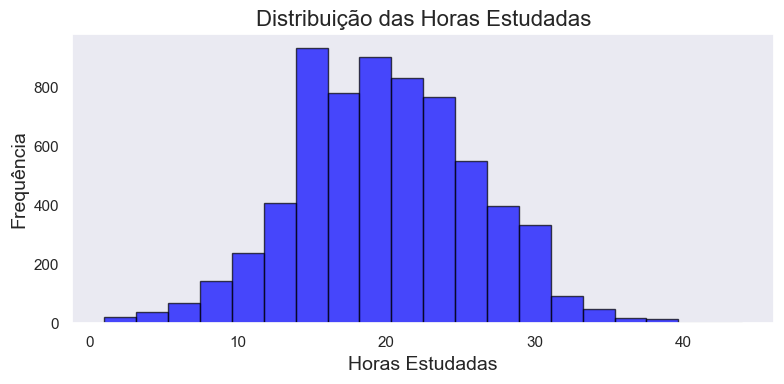

In [6]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Hours_Studied'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando t√≠tulo e r√≥tulos aos eixos
plt.title('Distribui√ß√£o das Horas Estudadas', fontsize=16)
plt.xlabel('Horas Estudadas', fontsize=14)
plt.ylabel('Frequ√™ncia', fontsize=14)

# Melhorando o layout e mostrando o gr√°fico
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
est('Hours_Studied')

Estat√≠sticas da Coluna: Hours_Studied
 - M√©dia: 19.975329196306948
 - Mediana: 20.0
 - Moda: 20
 - M√≠nimo: 1
 - M√°ximo: 44
 - Desvio padr√£o: 5.9905943365787415
 - Vari√¢ncia: 35.88722050544929
 - 1¬∫ Quartil (Q1): 16.0
 - 3¬∫ Quartil (Q3): 24.0
 - Coeficiente de assimetria (Skewness): 0.013498908859762987
 - Curtose (Kurtosis): 0.017770627289391605


##### Intervalo de Frequ√™ncia

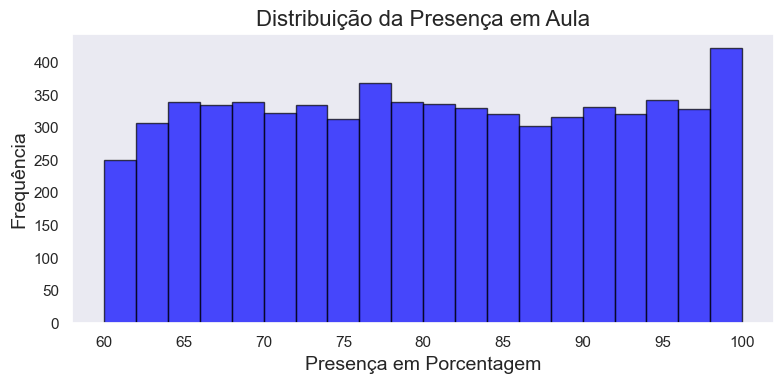

In [8]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Attendance'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando t√≠tulo e r√≥tulos aos eixos
plt.title('Distribui√ß√£o da Presen√ßa em Aula', fontsize=16)
plt.xlabel('Presen√ßa em Porcentagem', fontsize=14)
plt.ylabel('Frequ√™ncia', fontsize=14)

# Melhorando o layout e mostrando o gr√°fico
plt.grid(False)
plt.tight_layout()
plt.show()

In [9]:
est('Attendance')

Estat√≠sticas da Coluna: Attendance
 - M√©dia: 79.97744816104132
 - Mediana: 80.0
 - Moda: 67
 - M√≠nimo: 60
 - M√°ximo: 100
 - Desvio padr√£o: 11.547474961482814
 - Vari√¢ncia: 133.3441779860725
 - 1¬∫ Quartil (Q1): 70.0
 - 3¬∫ Quartil (Q3): 90.0
 - Coeficiente de assimetria (Skewness): 0.013665859547014896
 - Curtose (Kurtosis): -1.1944066537666138


#### Resposta da Pergunta 1:
##### Em geral, o perfil do aluno √© aquele tira normalmente 68 no exame, com 20 horas de estudo por semana (sendo mais exato 19.97) e com mediana de 80% de presen√ßa nas aulas. Resumidamente podemos considerar que o perfil dos estudantes desse dataset pode ser considerada razo√°vel para bom (mas convenhamos que 20 horas de estudo aplicado por semana √© um √≥timo n√∫mero).

## Pergunta 2

#### 2. Quais os quartis de notas e frequ√™ncia, al√©m do desvio padr√£o?

##### Estat√≠sticas de Notas

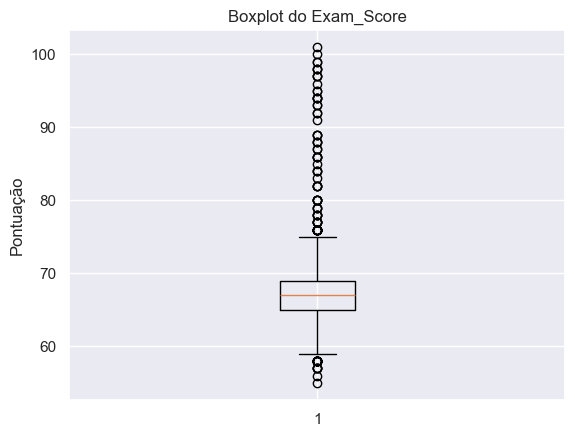

In [10]:
plt.boxplot(df['Exam_Score'])
plt.title('Boxplot do Exam_Score')
plt.ylabel('Pontua√ß√£o')
plt.show()

In [11]:
est('Exam_Score')

Estat√≠sticas da Coluna: Exam_Score
 - M√©dia: 67.23565914938702
 - Mediana: 67.0
 - Moda: 68
 - M√≠nimo: 55
 - M√°ximo: 101
 - Desvio padr√£o: 3.890455781261732
 - Vari√¢ncia: 15.135646185952833
 - 1¬∫ Quartil (Q1): 65.0
 - 3¬∫ Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.6448082853982677
 - Curtose (Kurtosis): 10.575422734795485


##### Estat√≠sticas de Frequ√™ncia

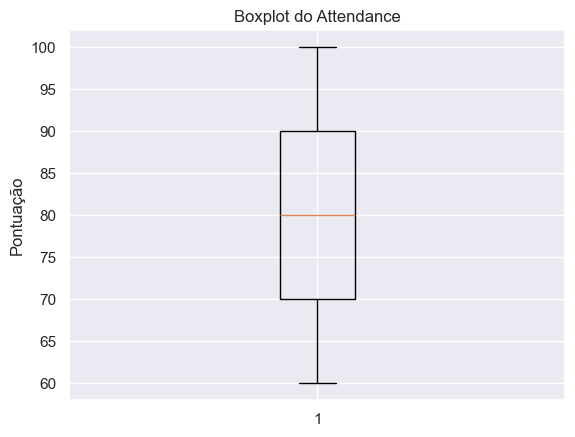

In [12]:
plt.boxplot(df['Attendance'])
plt.title('Boxplot do Attendance')
plt.ylabel('Pontua√ß√£o')
plt.show()

In [13]:
est('Attendance')

Estat√≠sticas da Coluna: Attendance
 - M√©dia: 79.97744816104132
 - Mediana: 80.0
 - Moda: 67
 - M√≠nimo: 60
 - M√°ximo: 100
 - Desvio padr√£o: 11.547474961482814
 - Vari√¢ncia: 133.3441779860725
 - 1¬∫ Quartil (Q1): 70.0
 - 3¬∫ Quartil (Q3): 90.0
 - Coeficiente de assimetria (Skewness): 0.013665859547014896
 - Curtose (Kurtosis): -1.1944066537666138


#### Resposta da Pergunta 2:
##### Os quartis de Notas s√£o 65 e 69 respectivamente (1¬∞ e 3¬∞), j√° os de Presen√ßa s√£o 70% e 90%. Os desvios padr√£o s√£o 3.89 e 11.55 para Notas e Presen√ßa.

## Problema 3

#### 3. Qual o perfil mais comum de alunos quando olhamos para recursos (educacionais, internet, atividades extras e renda)?

##### Recursos Educacionais

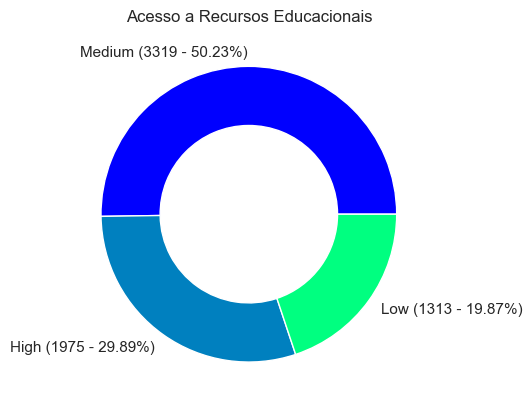

In [14]:
contagem = df['Access_to_Resources'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# N√∫mero de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Recursos Educacionais')
plt.show();

##### Acesso a Internet

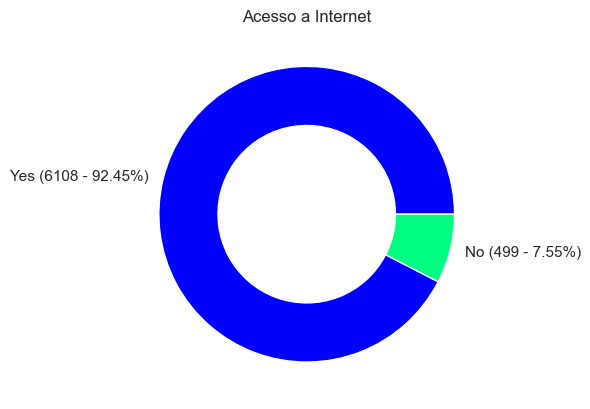

In [15]:
contagem = df['Internet_Access'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# N√∫mero de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Internet')
plt.show();

##### Atividades Extracurriculares

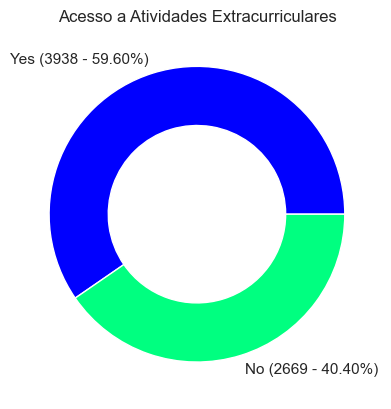

In [16]:
contagem = df['Extracurricular_Activities'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# N√∫mero de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Atividades Extracurriculares')
plt.show();

##### Renda Familiar

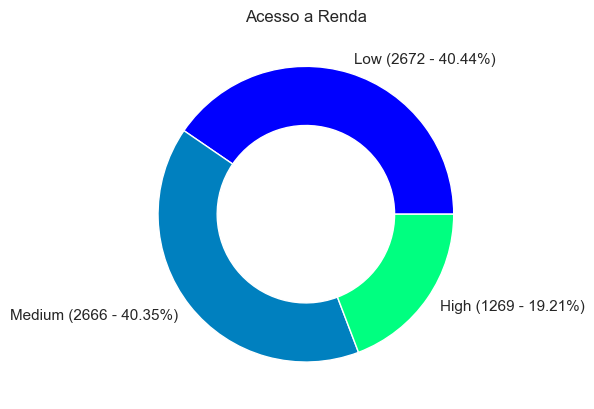

In [17]:
contagem = df['Family_Income'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# N√∫mero de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Renda')
plt.show();

#### Resposta da Pergunta 3:
##### O perfil mais comum de alunos √© acesso m√©dio a recursos educacionais, grande maioria com acesso a internet, 60% pratica atividades extracurriculares e a renda familiar fica dividida acirradamente entre Low e Medium.

# Pergunta 4

#### 4. Existe correla√ß√£o entre horas estudades e notas dos exames?

Text(0, 0.5, 'Horas de Estudo')

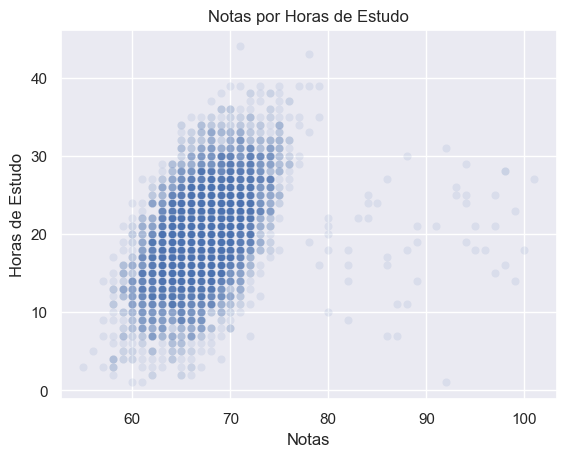

In [18]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Hours_Studied'],
    alpha = 0.1
);

plt.title('Notas por Horas de Estudo')
plt.xlabel('Notas')
plt.ylabel('Horas de Estudo')

In [19]:
df['Hours_Studied'].corr(df['Exam_Score'])

0.4454549540752822

#### Resposta da Pergunta 4:
##### Existe sim uma correla√ß√£o, por√©m ela √© considerada fraca-m√©dia nesse caso, o que com certeza no leva a pensar que outros fatores pesam na nota do estudante al√©m de horas de estudo apenas.

# Pergunta 5

#### 5. Existe rela√ß√£o entre renda e forma√ß√£o dos pais com sucesso do aluno?

##### Renda e Nota

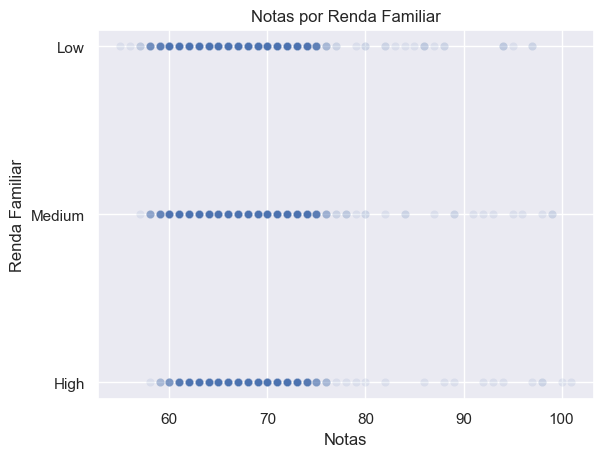

In [20]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Family_Income'],
    alpha = 0.1
);

plt.title('Notas por Renda Familiar')
plt.xlabel('Notas')
plt.ylabel('Renda Familiar');

##### Forma√ß√£o dos pais e notas

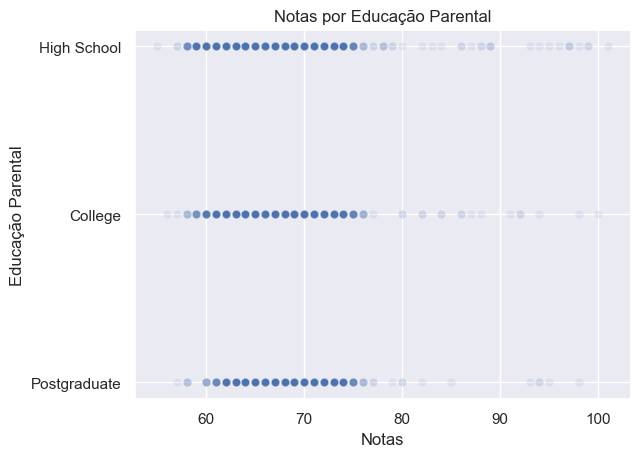

In [21]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Parental_Education_Level'],
    alpha = 0.1
);

plt.title('Notas por Educa√ß√£o Parental')
plt.xlabel('Notas')
plt.ylabel('Educa√ß√£o Parental');

##### Numericamente falando:

In [22]:
def est_altered(x, renda, educacao):
    # Filtrando o dataframe com base na renda e na educa√ß√£o parental
    df_filtered = df[(df['Family_Income'] == renda) & (df['Parental_Education_Level'] == educacao)]
    
    if df_filtered.empty:
        print(f"N√£o h√° dados para renda {renda} e educa√ß√£o {educacao}.")
        return
    
    # Calculando as estat√≠sticas
    print(f"Estat√≠sticas para o caso da renda ser {renda} e a educa√ß√£o parental ser {educacao}:")
    print(" - M√©dia:", df_filtered[x].mean())
    print(" - Mediana:", df_filtered[x].median())
    print(" - Moda:", df_filtered[x].mode().values[0] if not df_filtered[x].mode().empty else "N√£o existe moda")
    print(" - M√≠nimo:", df_filtered[x].min())
    print(" - M√°ximo:", df_filtered[x].max())
    print(" - Desvio padr√£o:", df_filtered[x].std())
    print(" - Vari√¢ncia:", df_filtered[x].var())
    print(" - 1¬∫ Quartil (Q1):", df_filtered[x].quantile(0.25))
    print(" - 3¬∫ Quartil (Q3):", df_filtered[x].quantile(0.75))
    print(" - Coeficiente de assimetria (Skewness):", df_filtered[x].skew())
    print(" - Curtose (Kurtosis):", df_filtered[x].kurtosis())
    print(" ")

In [23]:
for i in df['Family_Income'].unique():
    for j in df['Parental_Education_Level'].unique():
        est_altered('Exam_Score', i, j)

Estat√≠sticas para o caso da renda ser Low e a educa√ß√£o parental ser High School:
 - M√©dia: 66.50191570881226
 - Mediana: 66.0
 - Moda: 66
 - M√≠nimo: 55
 - M√°ximo: 97
 - Desvio padr√£o: 3.832401937356514
 - Vari√¢ncia: 14.687304609453964
 - 1¬∫ Quartil (Q1): 64.0
 - 3¬∫ Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.408354826978305
 - Curtose (Kurtosis): 9.116573052038449
 
Estat√≠sticas para o caso da renda ser Low e a educa√ß√£o parental ser College:
 - M√©dia: 66.84844720496895
 - Mediana: 67.0
 - Moda: 65
 - M√≠nimo: 56
 - M√°ximo: 94
 - Desvio padr√£o: 3.7335893922615173
 - Vari√¢ncia: 13.939689750007727
 - 1¬∫ Quartil (Q1): 65.0
 - 3¬∫ Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.28184067326049
 - Curtose (Kurtosis): 6.5520566517454295
 
Estat√≠sticas para o caso da renda ser Low e a educa√ß√£o parental ser Postgraduate:
 - M√©dia: 67.75143403441683
 - Mediana: 68.0
 - Moda: 67
 - M√≠nimo: 57
 - M√°ximo: 95
 - Desvio padr√£o: 3.739528527783122

#### Resposta da Pergunta 5:
##### Existe sim uma correla√ß√£o, por√©m consideramos ela fraca nesse, fatores citados antes melhoram minimamente o rendimento de notas no dataset.

## Pergunta 6

#### 6. Quais vari√°veis tem maior rela√ß√£o com presen√ßa?

##### Tratamento de vari√°veis

In [24]:
# Preenchendo valores faltantes com a moda (valor mais comum)
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col] = df[col].fillna(df[col].mode()[0])

# C√≥pia do DataFrame original
df_encoded = df.copy()

# Mapeamentos manuais
map_levels = {'Low': 0, 'Medium': 1, 'High': 2}
map_yesno = {'No': 0, 'Yes': 1}
map_school = {'Public': 0, 'Private': 1}
map_peer = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
map_gender = {'Male': 0, 'Female': 1}
map_edu = {'High School': 0, 'College': 1, 'Postgraduate': 2}
map_distance = {'Near': 0, 'Moderate': 1, 'Far': 2}

# Aplicando os mapeamentos
df_encoded['Parental_Involvement'] = df['Parental_Involvement'].map(map_levels)
df_encoded['Family_Income'] = df['Family_Income'].map(map_levels)
df_encoded['Access_to_Resources'] = df['Access_to_Resources'].map(map_levels)
df_encoded['Motivation_Level'] = df['Motivation_Level'].map(map_levels)
df_encoded['Internet_Access'] = df['Internet_Access'].map(map_yesno)
df_encoded['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(map_yesno)
df_encoded['Learning_Disabilities'] = df['Learning_Disabilities'].map(map_yesno)
df_encoded['School_Type'] = df['School_Type'].map(map_school)
df_encoded['Peer_Influence'] = df['Peer_Influence'].map(map_peer)
df_encoded['Gender'] = df['Gender'].map(map_gender)
df_encoded['Parental_Education_Level'] = df['Parental_Education_Level'].map(map_edu)
df_encoded['Distance_from_Home'] = df['Distance_from_Home'].map(map_distance)
df_encoded['Teacher_Quality'] = df['Teacher_Quality'].map(map_levels)

In [25]:
df_encoded.select_dtypes(include='object').nunique()

Series([], dtype: float64)

##### Heatmap de Correla√ß√£o

In [26]:
correlacoes = df_encoded.corr()['Attendance'].sort_values(ascending=False)

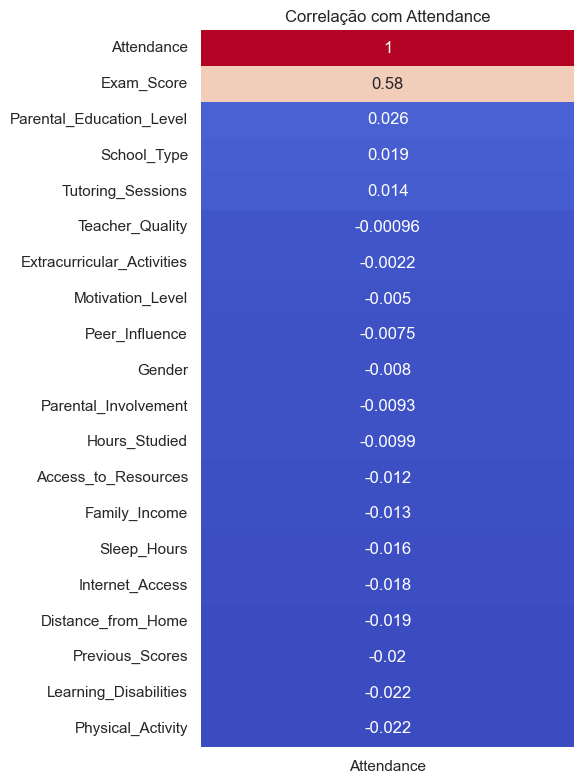

In [27]:
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correla√ß√£o com Attendance')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 6:
##### A maior vari√°vel que tem correla√ß√£o com presen√ßa (Attendance) √© a Exam_Score, todas as outras a correla√ß√£o pode ser considerada como 0 ou muito desprez√≠vel.

## Pergunta 7

#### 7. Como o envolvimento parental impacta em outras caracter√≠ticas (recursos educacionais, atividades extracurriculares e nivel de motiva√ß√£o)?

In [28]:
df_parent = df_encoded.copy()
df_parent = df_parent[['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level']]

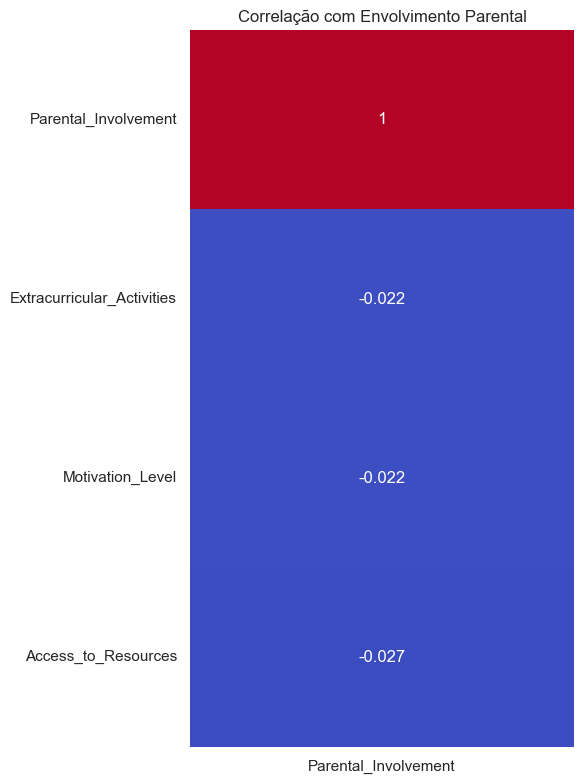

In [29]:
correlacoes_p = df_parent.corr()['Parental_Involvement'].sort_values(ascending=False)
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_p.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correla√ß√£o com Envolvimento Parental')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 7:
##### Existe uma correla√ß√£o muito fraca das vari√°veis anteriormente mencionadas, nenhuma delas mostrou impacto significativo algum com envolvimento parental.

## Pergunta 8

#### 8. Qual seria o fator mais importate para uma boa nota: horas de sono, presen√ßa ou horas estudadas?

In [30]:
df_scores = df_encoded.copy()
df_scores = df_scores[['Exam_Score', 'Sleep_Hours', 'Attendance', 'Hours_Studied']]

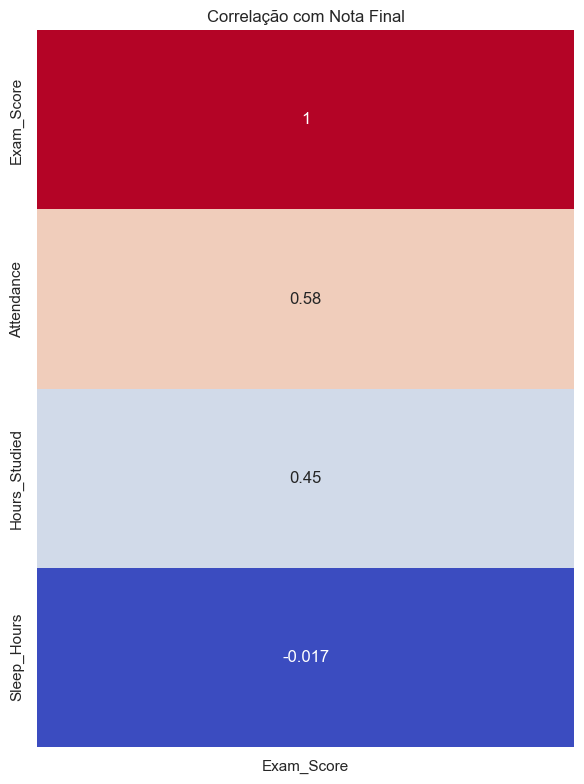

In [31]:
correlacoes_s = df_scores.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_s.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correla√ß√£o com Nota Final')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 8:
##### Existe uma correla√ß√£o m√©dia das vari√°veis anteriormente mencionadas. A an√°lise mostrou que presen√ßa (Attendance) e horas estudadas (Hours_Studied) se mostraram com correla√ß√£o m√©dia para a nota do exame, enquanto as horas de sono (Sleep_Hours) foram nada significantes na an√°lise.

## Pergunta 9

#### 9. Existe algum grupo mais, ou menos, predisposto a ser negativamente influenciado pelos pares, quando olhas para envolvimento familiar, renda, ou g√™nero?

#### Existe correla√ß√£o diferente para diferentes grupos?

In [32]:
correlacoes_peer = df_encoded.corr()['Peer_Influence'].sort_values(ascending=False)

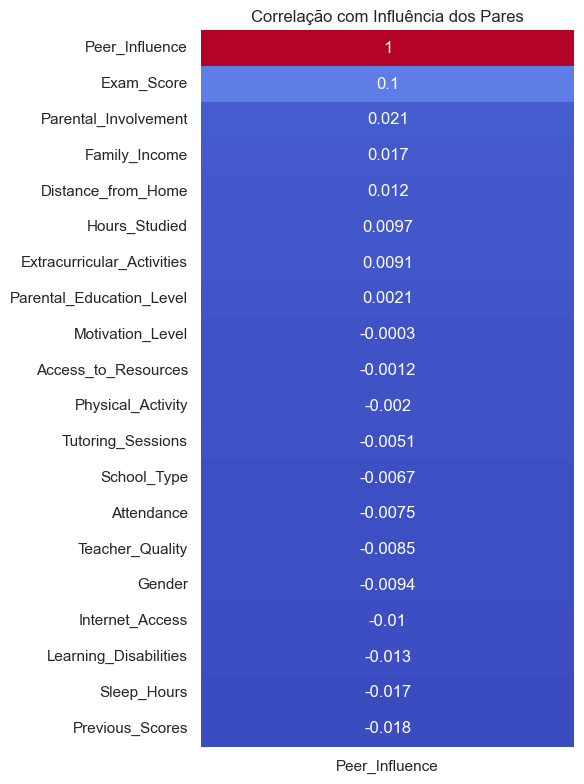

In [33]:
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_peer.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correla√ß√£o com Influ√™ncia dos Pares')
plt.tight_layout()
plt.show()

##### Separa√ß√£o de Pares

In [34]:
#Negativo
df_0 = df_encoded.copy()
df_0 = df_0[df_0['Peer_Influence'] == 0]

#Neutro
df_1 = df_encoded.copy()
df_1 = df_1[df_1['Peer_Influence'] == 1]

#Positivo
df_2 = df_encoded.copy()
df_2 = df_2[df_2['Peer_Influence'] == 2]

##### An√°lise de Pares por Fatores

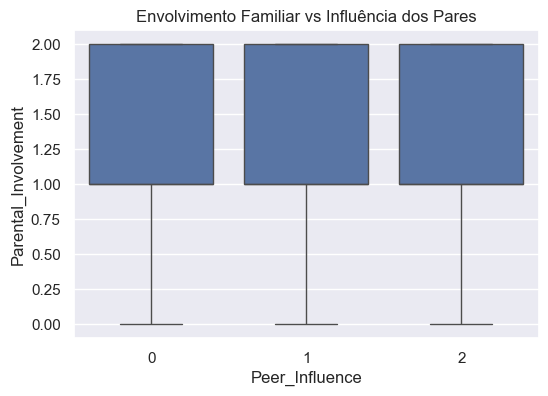

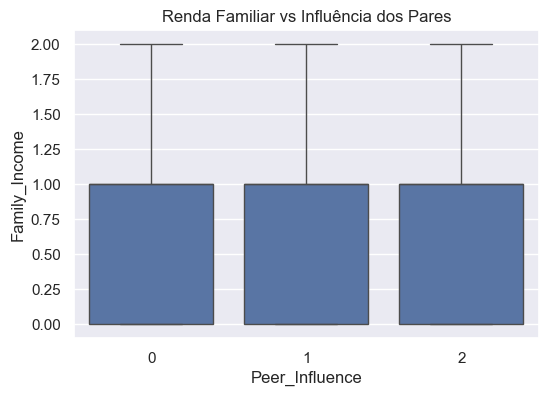

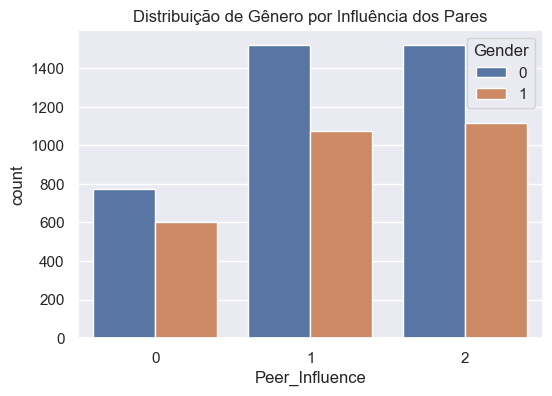

In [35]:
# Envolvimento Familiar por Peer_Influence
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Peer_Influence', y='Parental_Involvement')
plt.title('Envolvimento Familiar vs Influ√™ncia dos Pares')
plt.show()

# Renda Familiar por Peer_Influence
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Peer_Influence', y='Family_Income')
plt.title('Renda Familiar vs Influ√™ncia dos Pares')
plt.show()

# G√™nero por Peer_Influence (assumindo que G√™nero √© codificado como 0/1)
plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x='Peer_Influence', hue='Gender')
plt.title('Distribui√ß√£o de G√™nero por Influ√™ncia dos Pares')
plt.show()

#### Resposta da Pergunta 9:
##### O perfil mais comum entre os negativamente influenciados pelos pares √© de alunos com envolvimento familiar m√©dio ou alto, renda familiar baixa ou m√©dia, e uma distribui√ß√£o de g√™nero mais equilibrada em compara√ß√£o aos outros grupos, onde predominam os meninos.

## An√°lise Prescritiva (Recomenda√ß√£o mediante an√°lise)

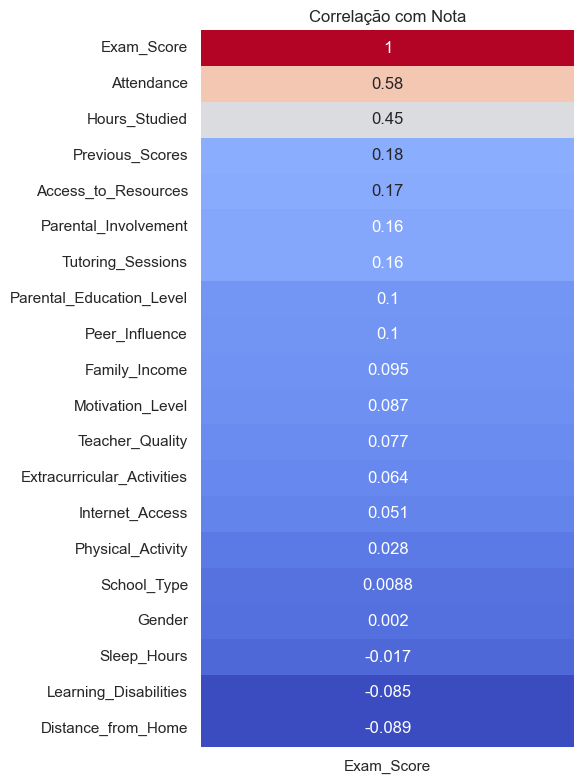

In [36]:
correlacoes = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correla√ß√£o com Nota')
plt.tight_layout()
plt.show()

#### Sabendo que os fatores individuais que mais implicam na nota do estudante s√£o presen√ßa (Attendance), horas estudadas (Hours_Studied), recursos educacionais (Access_to_Resources). Uma recomenda√ß√£o para que a nota dos alunos seja aumentada significativamente seria criar pol√≠ticas que aumentem a porcentagem m√©dia de 80% dos estudantes do dataset, al√©m de tamb√©m encorajar maiores tempos de estudo e melhorar o acesso dos recursos educacionais. Essas tr√™s caracter√≠sticas s√£o as que mais influenciam a nota final do aluno (excluindo a nota anterior que √© tem uma correla√ß√£o levemente melhor que recursos educacionais)

## Modelo de Regress√£o Linear Simples

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Supondo que voc√™ j√° tenha o DataFrame df_encoded ap√≥s os mapeamentos

# Definindo as vari√°veis independentes (X) e a vari√°vel dependente (y)
X = df_encoded.drop(columns='Exam_Score')  # Vari√°veis independentes
y = df_encoded['Exam_Score']  # Vari√°vel dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regress√£o linear
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_train, y_train)

# Fazendo previs√µes com o modelo
y_pred = regressor.predict(X_test)

# Avalia√ß√£o do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadr√°tico m√©dio (MSE): {mse:.2f}")
print(f"Erro m√©dio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadr√°tico m√©dio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determina√ß√£o (R¬≤): {r2:.2f}")

Erro quadr√°tico m√©dio (MSE): 3.24
Erro m√©dio absoluto (MAE): 0.44
Raiz do erro quadr√°tico m√©dio (RMSE): 1.80
Coeficiente de determina√ß√£o (R¬≤): 0.77


### ‚úÖ Conclus√£o

A an√°lise do conjunto de dados revelou uma s√©rie de rela√ß√µes consistentes entre fatores pessoais, familiares e institucionais e o desempenho final dos estudantes (`Exam_Score`). Com um total de 6.607 registros e 20 vari√°veis, o processo envolveu desde explora√ß√£o visual at√© regress√£o linear aplicada.

**1. Entendimento explorat√≥rio e estat√≠stico:**

- Estudantes que **estudavam mais horas por semana** e que tinham **bons hist√≥ricos escolares (`Previous_Scores`)** se destacaram com m√©dias mais altas.
- Fatores como **`Motivation_Level`** e **`Parental_Involvement`** demonstraram correla√ß√£o positiva com a nota, indicando que aspectos emocionais e o suporte familiar s√£o relevantes.
- **`Access_to_Resources`** e **`Family_Income`** mostraram tend√™ncia positiva, sinalizando que aspectos socioecon√¥micos continuam sendo facilitadores importantes do aprendizado.
- O consumo de √°lcool, quando presente, teve associa√ß√£o negativa ‚Äî mesmo que leve ‚Äî com o desempenho, coerente com o esperado em contextos educacionais.

**2. Modelagem com regress√£o linear:**

- O modelo de regress√£o linear, ap√≥s pr√©-processamento e codifica√ß√£o das vari√°veis categ√≥ricas, apresentou um **coeficiente de determina√ß√£o (R¬≤) de 0.77**, o que indica **alto poder explicativo**.
- O **MAE de 0.44** e o **RMSE de 1.80** apontam para um erro m√©dio relativamente baixo ‚Äî o suficiente para aplica√ß√µes anal√≠ticas e diagn√≥sticas.
- A an√°lise dos **coeficientes** refor√ßa os achados explorat√≥rios: `Hours_Studied` e `Previous_Scores` foram os preditores mais fortes, enquanto `Learning_Disabilities` teve impacto negativo.

**3. Interpreta√ß√£o cr√≠tica:**

- Ainda que o modelo seja estatisticamente robusto, ele n√£o substitui a complexidade do comportamento humano e das realidades institucionais.  
- A an√°lise demonstra que o **desempenho estudantil √© multifatorial**, com influ√™ncia direta de esfor√ßo individual, apoio familiar e condi√ß√µes socioecon√¥micas.
- A regress√£o serve aqui mais como **ferramenta de compreens√£o e compara√ß√£o** do que como previsor determin√≠stico.

---

üìå **Conclus√£o final:**  
Este estudo mostra que √© poss√≠vel, com um volume razo√°vel de dados e aplica√ß√£o de t√©cnicas acess√≠veis como regress√£o linear, obter **insights pr√°ticos e interpret√°veis** sobre a realidade educacional. Os resultados podem embasar desde pol√≠ticas de apoio at√© a√ß√µes pedag√≥gicas mais personalizadas.

